Iteration 1/30 → Best Accuracy: 0.9615
Iteration 2/30 → Best Accuracy: 0.9615
Iteration 3/30 → Best Accuracy: 0.9615
Iteration 4/30 → Best Accuracy: 0.9615
Iteration 5/30 → Best Accuracy: 0.9615
Iteration 6/30 → Best Accuracy: 0.9615
Iteration 7/30 → Best Accuracy: 0.9615
Iteration 8/30 → Best Accuracy: 0.9615
Iteration 9/30 → Best Accuracy: 0.9615
Iteration 10/30 → Best Accuracy: 0.9615
Iteration 11/30 → Best Accuracy: 0.9615
Iteration 12/30 → Best Accuracy: 0.9615
Iteration 13/30 → Best Accuracy: 0.9615
Iteration 14/30 → Best Accuracy: 0.9615
Iteration 15/30 → Best Accuracy: 0.9615
Iteration 16/30 → Best Accuracy: 0.9615
Iteration 17/30 → Best Accuracy: 0.9615
Iteration 18/30 → Best Accuracy: 0.9615
Iteration 19/30 → Best Accuracy: 0.9615
Iteration 20/30 → Best Accuracy: 0.9615
Iteration 21/30 → Best Accuracy: 0.9615
Iteration 22/30 → Best Accuracy: 0.9615
Iteration 23/30 → Best Accuracy: 0.9615
Iteration 24/30 → Best Accuracy: 0.9615
Iteration 25/30 → Best Accuracy: 0.9615
Iteration

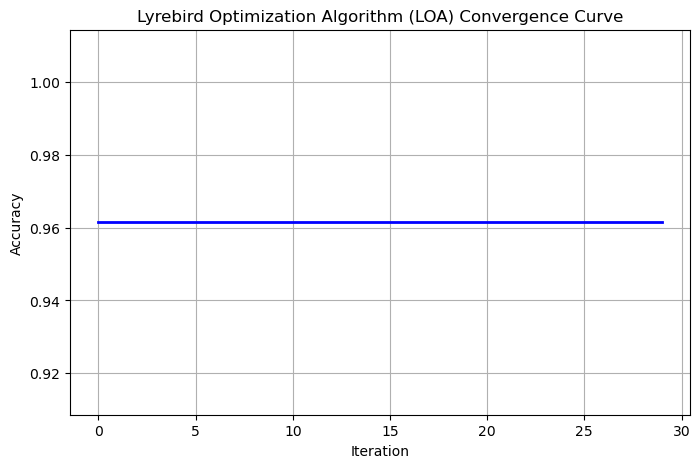

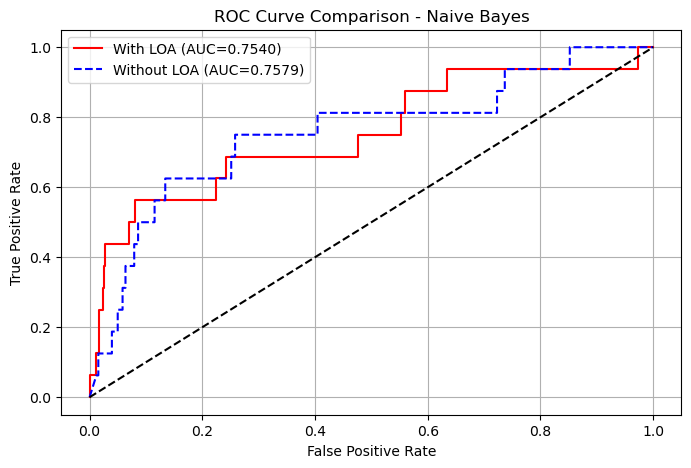


====================== SUMMARY COMPARISON ======================
Metric       | With LOA   | Without LOA
---------------------------------------------------------------
Accuracy     | 0.9615     | 0.9263    
Precision    | 0.2667     | 0.1111    
Recall       | 0.2500     | 0.2500    
F1-Score     | 0.2581     | 0.1538    
AUC          | 0.7540     | 0.7579    


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --------------------------- 1️⃣ Load and Prepare Dataset ---------------------------
# Update this path to where your MC1_csv.csv file is located on your local machine
data = pd.read_csv(r"C:\Users\KIIT\OneDrive\Desktop\project\mc1_csv.csv")  # Change this to local path

# Encode categorical columns if any
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = LabelEncoder().fit_transform(data[col])

# Split features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# --------------------------- 2️⃣ Lyrebird Optimization Algorithm (LOA) ---------------------------
def LOA(num_agents, max_iter, X, y):
    num_features = X.shape[1]
    population = np.random.randint(0, 2, (num_agents, num_features))
    fitness = np.zeros(num_agents)

    def fitness_function(solution):
        if np.sum(solution) == 0:
            return 0
        X_sel = X[:, solution == 1]
        X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.3, random_state=42)
        model = GaussianNB()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Initial fitness calculation
    for i in range(num_agents):
        fitness[i] = fitness_function(population[i])

    best_idx = np.argmax(fitness)
    best_solution = population[best_idx].copy()
    best_fitness = fitness[best_idx]
    convergence_curve = []

    # Optimization loop
    for t in range(max_iter):
        for i in range(num_agents):
            rand1, rand2, rand3, rand4 = np.random.rand(4, num_features)
            new_sol = population[i] ^ ((rand1 < 0.5) & (rand2 > 0.5))
            new_sol = new_sol ^ ((rand3 > 0.7) | (rand4 < 0.3))
            new_sol = new_sol.astype(int)

            new_fit = fitness_function(new_sol)
            if new_fit > fitness[i]:
                population[i] = new_sol
                fitness[i] = new_fit

        # Update global best
        best_idx = np.argmax(fitness)
        if fitness[best_idx] > best_fitness:
            best_solution = population[best_idx].copy()
            best_fitness = fitness[best_idx]

        convergence_curve.append(best_fitness)
        print(f"Iteration {t+1}/{max_iter} → Best Accuracy: {best_fitness:.4f}")

    return best_solution, best_fitness, convergence_curve

# --------------------------- 3️⃣ Run LOA for Feature Selection ---------------------------
num_agents = 20
max_iter = 30

best_features, best_acc, convergence_curve = LOA(num_agents, max_iter, X, y)
selected_features = np.where(best_features == 1)[0]

print("\n✅ Selected Feature Indexes:", selected_features)
print("✅ Best Feature Subset Accuracy:", best_acc)

# --------------------------- 4️⃣ Naive Bayes with LOA Feature Selection ---------------------------
X_selected = X[:, best_features == 1]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
acc1 = accuracy_score(y_test, y_pred)
prec1 = precision_score(y_test, y_pred)
rec1 = recall_score(y_test, y_pred)
f11 = f1_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_prob)

print("\n=== 🦜 Naive Bayes with LOA Feature Selection ===")
print(f"Accuracy:  {acc1:.4f}")
print(f"Precision: {prec1:.4f}")
print(f"Recall:    {rec1:.4f}")
print(f"F1-Score:  {f11:.4f}")
print(f"AUC:       {auc1:.4f}")

# --------------------------- 5️⃣ Naive Bayes without Feature Selection (Baseline) ---------------------------
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

model2 = GaussianNB()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
y_prob2 = model2.predict_proba(X_test2)[:, 1]

# Evaluation metrics
acc2 = accuracy_score(y_test2, y_pred2)
prec2 = precision_score(y_test2, y_pred2)
rec2 = recall_score(y_test2, y_pred2)
f12 = f1_score(y_test2, y_pred2)
auc2 = roc_auc_score(y_test2, y_prob2)

print("\n=== ⚙️ Naive Bayes without Feature Selection ===")
print(f"Accuracy:  {acc2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall:    {rec2:.4f}")
print(f"F1-Score:  {f12:.4f}")
print(f"AUC:       {auc2:.4f}")

# --------------------------- 6️⃣ Visualizations ---------------------------
# Convergence curve
plt.figure(figsize=(8, 5))
plt.plot(convergence_curve, 'b-', linewidth=2)
plt.title("Lyrebird Optimization Algorithm (LOA) Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# ROC Curve Comparison
fpr1, tpr1, _ = roc_curve(y_test, y_prob)
fpr2, tpr2, _ = roc_curve(y_test2, y_prob2)

plt.figure(figsize=(8, 5))
plt.plot(fpr1, tpr1, 'r-', label=f'With LOA (AUC={auc1:.4f})')
plt.plot(fpr2, tpr2, 'b--', label=f'Without LOA (AUC={auc2:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison - Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------- 7️⃣ Summary Comparison ---------------------------
print("\n====================== SUMMARY COMPARISON ======================")
print(f"{'Metric':<12} | {'With LOA':<10} | {'Without LOA':<10}")
print("---------------------------------------------------------------")
print(f"{'Accuracy':<12} | {acc1:<10.4f} | {acc2:<10.4f}")
print(f"{'Precision':<12} | {prec1:<10.4f} | {prec2:<10.4f}")
print(f"{'Recall':<12} | {rec1:<10.4f} | {rec2:<10.4f}")
print(f"{'F1-Score':<12} | {f11:<10.4f} | {f12:<10.4f}")
print(f"{'AUC':<12} | {auc1:<10.4f} | {auc2:<10.4f}")
print("===============================================================")
